# Music Timbre and News Sentiment for the Past Millennium 
Group Name: BubbltTea  
Group Member: Jasmine Guan, Sheng Yang

(Data Citations are in README.md. This is for a succint report only. Hope you enjoy reading this!)

## Project Objective
Music has been a channel for artists to express social sentiments for long, but how are they correlated in effect? In this data visualization project, we are interested in **exploring the correlation between music timbre and news sentiment from 1920-2020**.  

Music timbre is the tone color of a song, a medium for song writers to deliver different emotions: a song marked with brightness is generally associated with elation and euphoric, whereas a song characterized by flatness is connected to melancholy and even ennui. To quantify timbre, [EchoNest](http://modelai.gettysburg.edu/2012/music/docs/EchoNestAnalyzeDocumentation.pdf), a data analysis platform, employs 12 specially designed basis to capture different aspects of music timbre, the first four of which, for example, are 

| Timbre Basis| Explanation |
| ----------- | ----------- |
| TimbreAvg1  | average loudness of the segment  |
| TimbreAvg2  | brightness |
| TimbreAvg3  | more closely correlated to the flatness of a sound |
| TimbreAvg4  | stronger attack |


On the other hand, we have [NLTK](https://www.nltk.org/), a mainstreamed natural language processing toolkit with a massive pretrained neural network at our disposal, that could assign four scores to each sentence corresponding to four different emotions: *negative*, *neutral*, *positive*, and *compound*. This package helps us convert words to sentiments.  

With the two data analysis platform, we are particularly interested in the following:   

1. How strong/weak a correlation do we have between each timbre and each sentiment? For example, could we expect a period with more negative sentiments to have music characterized by a flatter timbre?  
2. Does the correlation change overtime? If the correlation is strong, is it strong consistently across the entire 90 years?  


This report notebook is thus divided into three chunks: preprocessing, univariate analysis (on timbre averages and on nltk scores), and bivariate aggregate. The final section of this report is where we derive conclusions to the 2 questions above, along with other interesting observations 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# load packages 
import os 
import re 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import altair as alt 
alt.renderers.enable('default')

from util import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

## 1. Preprocess
(Details to be found in preprocess.py)  
- For timbre dataset, we compute the annual average of 12 features and give label of decades.  
- For NY Times news dataset, in each year, we compute the sentiment scores of each sentience, sum them up, and normalize four scores, so that after processing each year contains 4 numbers corresponding to the proportion of emotion of type negative, neutral, positive, and compound. 

## 2 Univariate Analysis
In this section, we explore the distributions of features in both dataset. Heatmap is heavily invoked.

In [3]:
# load preprocessed dataset 
timbre_avg_by_year, nltk_scores_by_year = read_avg_by_year()

### 2.1 Univariate Analysis on Timbre Features

As claimed, 12 features/basis capture different aspects of timbre. Their correlations are low as expected. 

In [4]:
timbre_path = os.path.join('data', 'year_prediction.csv')
timbre_avg = pd.read_csv(timbre_path).rename(columns={'label': 'year'})

In [5]:
audio = timbre_avg.iloc[:, 1:13]
corr = audio.corr().reset_index()
timbre_covs_long = corr.melt("index", var_name = "TimbreCorr", value_name = "Corr Values")
# timbre covariances # 
alt.Chart(timbre_covs_long).mark_rect().encode(
    x=alt.X('index:O', sort=timbre_cols),
    y=alt.Y('TimbreCorr:O', sort=timbre_cols),
    color='Corr Values:Q',
    tooltip=['index', 'TimbreCorr', 'Corr Values']
).properties(
    title='Average Timbre Correlations'
)

alt.Chart(...)

<b>Observations:
* Observation 1: Timbre1 (loudness) & Timbre2 (brightness) appears to be the most highly correlated with a Correlation Coefficient of 0.56
* Observation 2: Other Timbres appear to be relatively less correlated, which agrees with the API design of mapping audio into independent bases

#### Heatmap on timbre averages across the years.

In [6]:
# dispaly timbre_avg_by_year
timbre_avg_by_year.head()

,year,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,TimbreAvg10,TimbreAvg11,TimbreAvg12,decade
0,1922,41.563847,13.908623,14.684642,24.427253,18.752738,11.173280,-5.309713,0.136818,-2.164830,-4.444308,-1.621852,-5.560913,d20
1,1924,36.945466,-136.050156,108.086914,12.351610,-7.730282,1.872898,-32.485724,3.362986,14.375366,8.708374,4.782966,8.068350,d20
2,1925,34.359443,-128.216647,120.177701,19.374040,18.185651,17.011220,-56.728221,7.616783,3.783979,8.838653,6.741246,6.061280,d20
3,1926,32.572120,-126.464657,88.917274,7.843321,-5.841375,13.394603,-31.141998,9.859703,-17.412415,4.974054,0.624522,-2.053934,d20
4,1927,31.229186,-110.711278,59.213804,4.108315,-9.538370,9.985781,-21.011090,13.410433,-25.118038,4.396292,-0.394336,-2.645019,d20


In [7]:
# combine timbre_avgs_by_year into a long dataset for Heatmap creation
timbre_avg_long = timbre_avg_by_year.drop(
    columns=['decade']
    ).melt("year", var_name = "TimbreType", value_name = "Average Values")

# heatmap, plot average timbre features by year 
yearly_timbre = alt.Chart(timbre_avg_long).mark_rect().encode(
    x='year:O',
    y=alt.Y('TimbreType:O', sort=timbre_cols), 
    color='Average Values:Q',
    tooltip=['year', 'TimbreType', 'Average Values']
).properties(
    title='Average Timbre Features by Years',
    width=2000, height=300
)
yearly_timbre

alt.Chart(...)

<b>Observations:
* Observation 1: Timbre1 is consistently at a relatively high value
* Observation 2: 
    * Timbre2 was very low from 1920s to 1950s, but gradually stabalizes 
    * Timbre3 was very high from 1920s to 1950s, but also gradually stabalizes, to a very similar value as Timbre2 actaully
* Observation 3: with the exception of Timbre1, which is at the relatively high value, all other timbre is becoming more and more uniformly distributed as time period goes on
    * correlate to stability of society??
    * surprisingly: nothing significant for 2001 (9/11) --- maybe look more into the specific year to explore


#### Decade-wise
we have the following instead: 

In [8]:
# plot timbre feature averages by decades 
# compute decades 
timbre_avg_by_decade = pd.read_csv('preprocess/timbre_avg_by_decade.csv')
timbre_avg_by_decade_long = timbre_avg_by_decade.melt("decade", var_name='TimbreType', value_name='Average Values')
decade_seq = [f'd{s}0' for s in [2, 3, 4, 5, 6, 7, 8, 9, 0, 1]]
# make the plot
alt.Chart(timbre_avg_by_decade_long).mark_rect().encode(
    x=alt.X('decade:O', sort=decade_seq),
    y=alt.Y('TimbreType:O', sort=timbre_cols),
    color='Average Values:Q',
    tooltip=['decade', 'TimbreType', 'Average Values']
).properties(
    title='Average Timbre Features by Decade'
)

alt.Chart(...)

<b>Observations<b>
* Observation 1: TimbreAvg2 and TimbreAvg3 appears to have opposite trend before the 80s and converged into a relatively uniform distribution as other Timbres
* Observation 2: TimbreAv1 is consistently at the highest value across decades

<b> Explore Distribution Shift</b>: To explore distribution shift of significant timbres, we will use Ridgeline plots

In [9]:
timbre_avg_by_year["decade"] = timbre_avg_by_year.year.transform(year_to_decade_datetime)


In [10]:
plot_ridgeline(timbre_avg_by_year, "decade", "TimbreAvg1")

alt.FacetChart(...)

In [11]:
plot_ridgeline(timbre_avg_by_year, "decade", "TimbreAvg2")

alt.FacetChart(...)

In [12]:
plot_ridgeline(timbre_avg_by_year, "decade", "TimbreAvg3")

alt.FacetChart(...)

In [13]:
plot_ridgeline(timbre_avg_by_year, "decade", "TimbreAvg4")

alt.FacetChart(...)

<b>Observations
* Observation 1: TimbreAvg1 (average loudness)
    * The average loudness of popular music increased as time goes on. 
    * That is probably due to the technological advancement in music production as well as devices
* Observation 2: TimbreAvg2 (brightness)
    * Brightness of music showed a drastic change from negative value to positive values, which has stronger harmonic tones. 
    * This could be due to the advancement in music theory and the realization that certain harmonic combinations create more popular music (ex: Chainsmokers classic harmonic)
* Observation 3: TimbreAvg3 (flatness)
    * On the other hand, the flatness of music went from a more spread out distribution to a leftward shift to lower positive values
    * A lower flatness indicates that music is moving away from resemblance to white noise and is instead taking on more peaks and resonant structure
* Observation 4: TimbreAvg4 (attack)
    * The attack of sound shows decreasing variance with the exception of 2010s. 
    * This means that popular music are unifying around the time it takes to rise from 0 volume to max volume

### 2.2 Univariate Analysis on News
We may visualize the words by a word cloud. 

In [14]:
# we read in a sample file 
sample_path = os.path.join('preprocess', 'df_1920_sample.csv')
sample_data = open(sample_path, 'r').read()  # reading in as a txt is faster to process
sample_data[:100]

',year,sentence\n0,1920,"ROME, Jan. 2.--It is of the utmost importance that the Flume local situation '

In [15]:
# count_words_by_year 
count_words_by_year(sample_path)  # all occurrence

new                  20501
will                 19520
yesterday            12641
today                12063
no                   10298
                     ...  
scandalmongers           1
mornig                   1
namesplaintiff           1
ofhigh                   1
disciplineadmiral        1
Length: 70407, dtype: int64

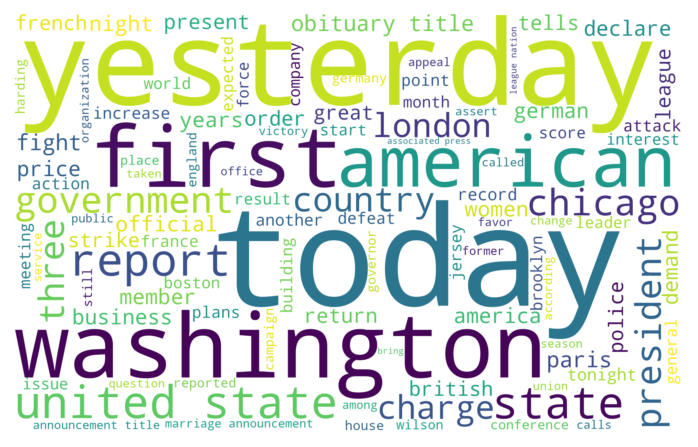

In [16]:
# example 
plot_word_cloud_of_year(sample_path) # only visualize words that have a length larger than 5

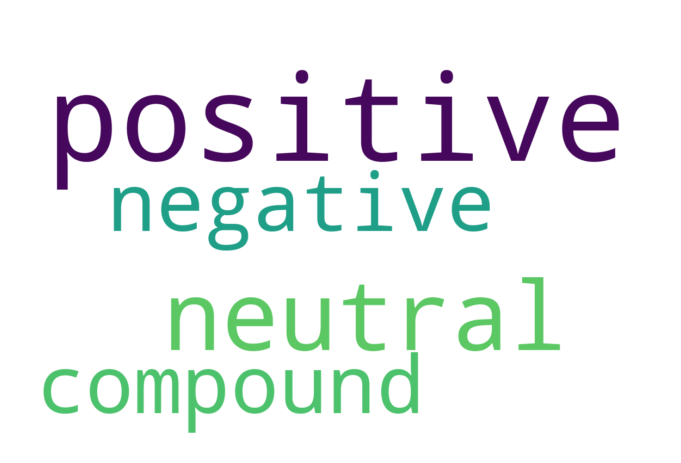

In [17]:
# a dummy demo
generate_demo_sentiment_word_cloud()

## 3. Correlation of sentiments and timbre

Now we compute the correlation between each sentiment and each timbre basis to see if their correlation matches our perception. 

In [18]:
visualize_corr_timbre_nltk(timbre_avg_by_year, nltk_scores_by_year)

alt.Chart(...)

TODO: modify observations  

Observations: 
- Timbre 2 is negatively correlated with both negative and positive sentiment (hmmmmmmmm)
- Timbre 3 is strongly positively correlated with negative emotion (as expected!), and negatively correlated with compound emotion. 

Question to explore in presentation: 
- For the first four timbre averages, which sentiment is it strongly/negatively positvely correlated to?
- For each sentiment, which Timbre features is it closely related to?

Although correlation heatmap offers the general correlation, we would like to dig further into the correlation in a decade scale. A scatter plot with a regreesion line is necessary, to see which decades contribute the most to the general positive/negative correlation.

In [19]:
# visualize a single plot only 
visualize_timbre_nltk_regression(timbre_avg_by_year, nltk_scores_by_year)

alt.HConcatChart(...)

Finally, we combine the two plots above to make scatter plot for each combinations of them. 

In [20]:
# final presentation
visualize_agg_plot(timbre_avg_by_year, nltk_scores_by_year)

alt.VConcatChart(...)

<b> Observations <b>

- General 
    * For most combinations, 1920s to 1940s (Jazz Age) contribute the most to respective positive/negative correlation.  
    * As time passes by, the strong correlation starts to vanish: timbre average values becomes flatter with respect to sentiment value, and the points become more clustered (less variation across years). --> emotion gets more complex.  

* Strongest Correlation for each <b> emotion </b>
    * Negative Emotion:
        * Positive Correlation: Timbre3 (flatness): r = 0.72
        * Negative Correlation: Timbre2 (brightness): r = -0.74
    * Positive Emotion:
        * Positive Correlation: Timbre6: r = 0.38
        * Negative Correlation: Timbre11: r = -0.33
    * Neutral Emotion:
        * Positive Correlation: Timbre8 and Timbre10: r = 0.51
        * Negative Correlation: Timbre2 (brightness): r = -0.59
    


# Conclusion 
Ultimately, we want to explore the relation between <b> perceivable timbres, sentiment, and 
* Timbre1 (loudness): Negative Emotion (r = -0.64)
    * As time increases:
        * Negative sentiment decreases
        * Timbre1 (loudness) increases
* Timbre2 (brightness): Negative Emotion (r = -0.74)
    * As time increases:
        * Negative sentiment decreases
        * Timbre2 (brightness) increases
        * Variance of Sentiment & Variance of Timbre decreases
* Timbre3 (flatness): Negative Emotion (r = 0.72)
    * As time increases:
        * Negative sentiment decreases
        * Timbre3 (flatness) decreases
        * Variance of Sentiment & Variance of Timbre decreases
* Timbre4 (attack): Negative Emotion (r = 0.12)
    * The correlation to negative emotion is extremely small compare to others